In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
f = open('predictions.txt', 'r')
content = f.read()
f.close()

In [4]:
temp = [i.split('\t') for i in content.split('\n')]
flatten_list = [item for subl in temp for item in subl]
L = [j for j in flatten_list if j!='']

In [5]:
res = {}
start=False
for i, ele in enumerate(L):
    title = ele.split(' ')
    if title[0]=='Evaluating':
        #print(title[-1])
        if start==False:
            idx = i
            start = True
            mod = title[1].split('/')[-1][:-8]
        else:
            idx_e = i
            res[mod]=L[idx:idx_e]
            idx = idx_e
            mod = title[1].split('/')[-1][:-8]
res[mod]=L[idx_e:]

In [28]:
stat = {}
for key in res.keys():
    st = {'intra':res[key][2:27], 'inter':res[key][28:]}
    stat[key[:-24].replace('predictions_', '')] = st
stat.keys()

dict_keys(['bert-large-uncased', 'bert-base-cased', 'Bio_ClinicalBERT', 'Bio_Discharge_Summary_BERT', 'bert-base-uncased', 'biobert-base-cased-v1.1', 'bert-large-cased', 'scibert_scivocab_uncased', 'scibert_scivocab_cased'])

In [32]:
models = ['bert-large-uncased', 'bert-base-cased', 'bert-base-uncased', 'bert-large-cased']
sci_intra = ['scibert_scivocab_uncased',  'scibert_scivocab_cased', 'Bio_ClinicalBERT', 'Bio_Discharge_Summary_BERT']
models = models+sci_intra+['biobert-base-cased-v1.1']

In [98]:
models = ['bert-base-cased', 'bert-large-cased']
sci_intra = ['scibert_scivocab_uncased', 'scibert_scivocab_cased', 'Bio_ClinicalBERT', 'Bio_Discharge_Summary_BERT']
models = models+sci_intra+['biobert-base-cased-v1.1']

In [99]:
intra = {}
for model in models:
    temp = {}
    for item in stat[model]['intra']:
        if ':' not in item:
            k = item
            temp[k] = []
        elif item.split(':')[0]!='Count':
            temp[k].append(float(item.split(':')[-1]))
    intra[model] = temp

In [100]:
inter = {}
for model in models:
    temp = {}
    for item in stat[model]['inter']:
        if ':' not in item:
            k = item
            temp[k] = []
        elif item.split(':')[0]!='Count':
            temp[k].append(float(item.split(':')[-1]))
    inter[model] = temp

In [101]:
df_ra = pd.DataFrame.from_dict(intra, orient='index')
df_er = pd.DataFrame.from_dict(inter, orient='index')
keywords = df_ra.keys().values

In [102]:
df_ra.index.tolist()

['bert-base-cased',
 'bert-large-cased',
 'scibert_scivocab_uncased',
 'scibert_scivocab_cased',
 'Bio_ClinicalBERT',
 'Bio_Discharge_Summary_BERT',
 'biobert-base-cased-v1.1']

In [103]:
df_ra.head()

,gender,profession,race,religion,overall
bert-base-cased,"[82.50328729241772, 61.48204661682922, 63.5571...","[82.31092099986019, 60.8476591974996, 64.45330...","[83.82409779040428, 56.29627559199869, 73.2685...","[82.16091954022988, 56.27586206896552, 71.8483...","[83.01912382272438, 58.68030062800166, 68.6065..."
bert-large-cased,"[83.10162156683897, 64.03633307111568, 59.7727...","[83.03922985789883, 60.29806018608655, 65.9363...","[84.01668497315835, 57.271266910163185, 71.798...","[85.97701149425286, 50.160919540229884, 85.700...","[83.60411145470651, 59.00700637570022, 68.5436..."
scibert_scivocab_uncased,"[71.4550226745879, 50.70705944618988, 70.44456...","[75.47850371532301, 46.896053996269806, 70.792...","[75.26254898072585, 58.812914185600825, 61.996...","[73.95402298850574, 55.72413793103448, 65.4875...","[74.81290089211667, 53.144171377528174, 70.108..."
scibert_scivocab_cased,"[70.77731962079788, 49.31986548073504, 69.8145...","[72.74537094349486, 48.12443359462692, 70.0165...","[71.78646663877537, 55.15582731815609, 64.3840...","[73.37931034482759, 52.87356321839081, 69.1621...","[72.08335512080025, 51.66028019942975, 69.6897..."
Bio_ClinicalBERT,"[74.44717810369984, 56.229915495132886, 65.171...","[73.68522234108896, 54.689981988209496, 66.773...","[74.62138540672191, 55.43803865402811, 66.5055...","[67.19540229885058, 47.90804597701149, 64.3840...","[73.96182952921781, 54.96825498827416, 66.6126..."


In [104]:
df_er.head()

,gender,profession,race,religion,overall
bert-base-cased,"[90.84746774964165, 62.026618711401326, 68.995...","[85.87218285497853, 62.32294703538678, 64.7082...","[89.67450156426334, 58.359268553512166, 74.682...","[93.6455938697318, 61.03639846743295, 72.97539...","[85.77180212754598, 59.555742005152865, 69.379..."
bert-large-cased,"[92.56729884447276, 63.93352621613492, 66.7715...","[84.62227909691758, 62.92931380612137, 62.7401...","[89.21909643905533, 57.14036291004528, 76.4779...","[90.13697318007662, 56.741379310344826, 77.984...","[85.77079222611553, 59.65087975851371, 69.2155..."
scibert_scivocab_uncased,"[13.53674505848419, 47.801843888800406, 12.941...","[17.882641717309863, 47.24515957065087, 16.897...","[18.53040640953136, 45.48462425929673, 16.8569...","[13.64272030651341, 36.72030651340996, 10.0192...","[46.07131287852242, 49.58281163320731, 45.6869..."
scibert_scivocab_cased,"[13.01985454159367, 42.86563677868026, 11.1620...","[20.711127875338104, 49.99144152445969, 20.707...","[24.408390521278292, 48.28449058242964, 23.570...","[19.578544061302683, 44.09578544061302, 17.266...","[46.6287733195658, 49.918880733161224, 46.5531..."
Bio_ClinicalBERT,"[13.304799065668629, 46.56518199996461, 12.390...","[23.858196713406198, 49.27214923735131, 23.510...","[24.663223159229524, 53.327640716328766, 23.02...","[24.089080459770116, 54.137931034482754, 22.09...","[48.402231308249334, 52.99210080519164, 45.505..."


In [105]:
intra_spl = {}
for kw in keywords:
    hold = {}
    for key in df_ra[kw].keys():
        if key!='biobert-base-cased-v1.1':
            val = df_ra[kw][key]
            temp = {'lm': val[0], 'ss': val[1], 'icat':val[2]}
            hold[key] = temp    
        intra_spl[kw] = hold    

In [106]:
df_ra['gender'].keys()

Index(['bert-base-cased', 'bert-large-cased', 'scibert_scivocab_uncased',
       'scibert_scivocab_cased', 'Bio_ClinicalBERT',
       'Bio_Discharge_Summary_BERT', 'biobert-base-cased-v1.1'],
      dtype='object')

In [107]:
inter_spl = {}
for kw in keywords:
    hold = {}
    for key in df_er[kw].keys():
        if key not in sci_intra:
            val = df_er[kw][key]
            temp = {'lm': val[0], 'ss': val[1], 'icat':val[2]}
            hold[key] = temp    
        inter_spl[kw] = hold    

## Visualizations

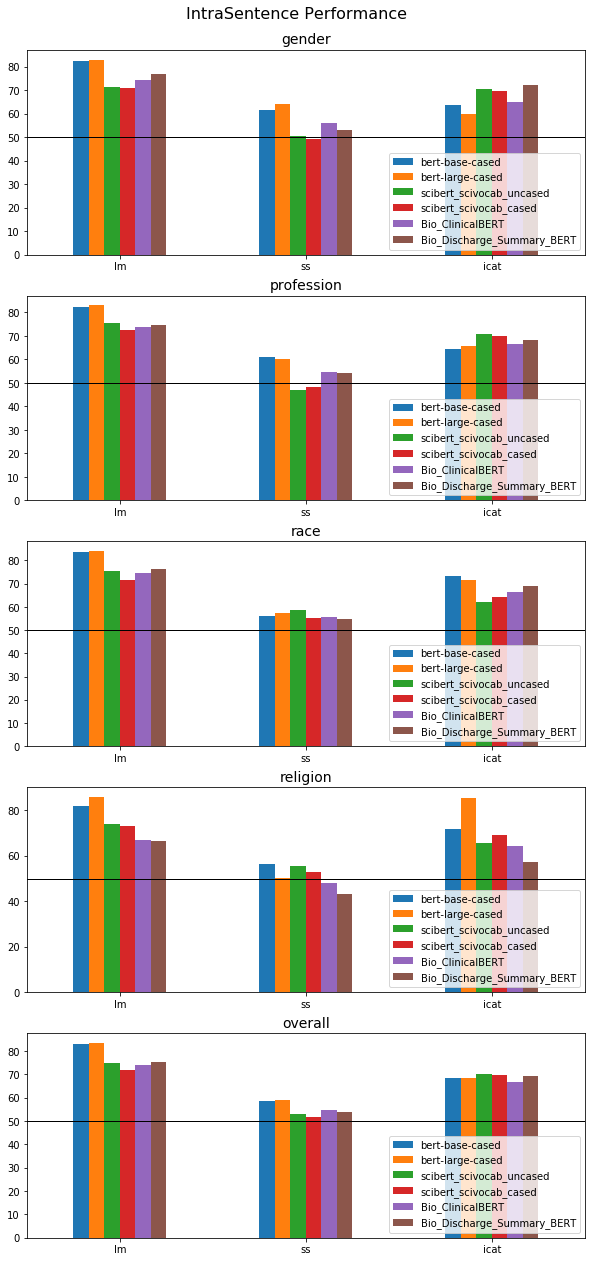

In [108]:
intra_fig, intra_axes = plt.subplots(5, 1, figsize=(10,20))
intra_fig.suptitle('IntraSentence Performance', fontsize=16)
intra_fig.subplots_adjust(top=.95)
for i, k in enumerate(keywords):
    df = pd.DataFrame(intra_spl[k])
    df.plot(kind='bar', rot=0, ax=intra_axes[i])
    intra_axes[i].set_title(k, fontsize=14)
    intra_axes[i].legend(loc='lower right')
    intra_axes[i].axhline(y=50,linewidth=1, color='k')

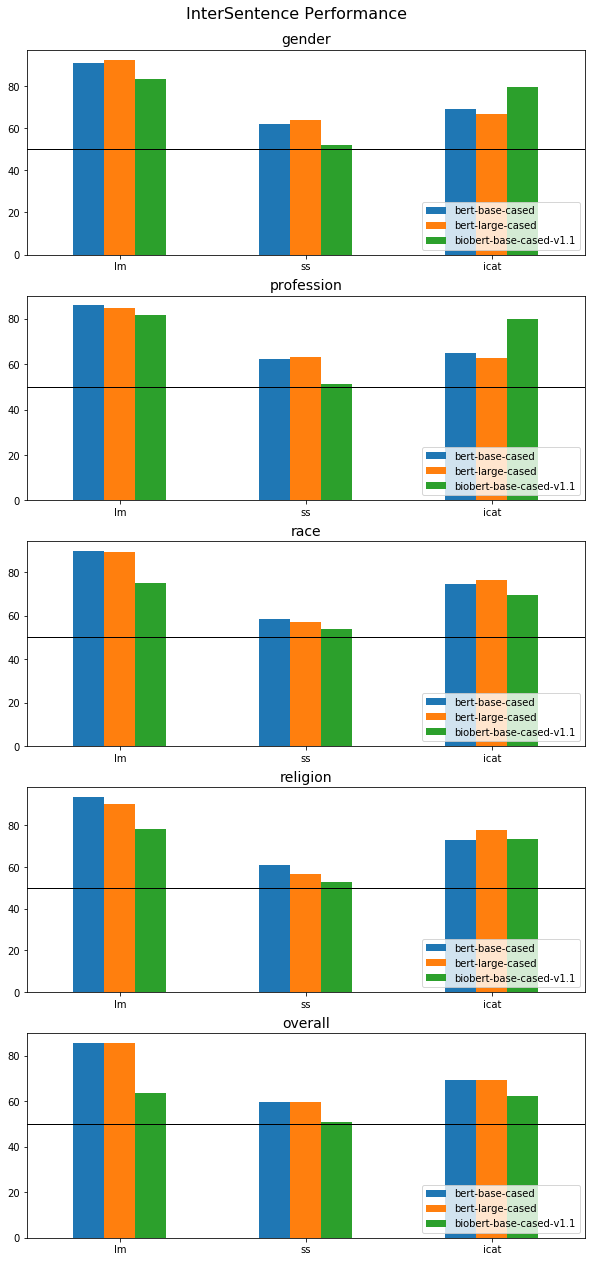

In [109]:
inter_fig, inter_axes = plt.subplots(5, 1, figsize=(10,20))
inter_fig.suptitle('InterSentence Performance', fontsize=16)
inter_fig.subplots_adjust(top=.95)
for i, k in enumerate(keywords):
    df = pd.DataFrame(inter_spl[k])
    df.plot(kind='bar', rot=0, ax=inter_axes[i])
    inter_axes[i].set_title(k, fontsize=14)
    inter_axes[i].legend(loc='lower right')
    inter_axes[i].axhline(y=50,linewidth=1, color='k')